# Landcover consensus

In [10]:
using SpeciesDistributionToolkit
using CairoMakie
CairoMakie.activate!(px_per_unit = 6.0)

In [11]:
place = SpeciesDistributionToolkit.gadm("PRY")
extent = SpeciesDistributionToolkit.boundingbox(place)

(left = -62.642398834228516, right = -54.25859832763672, bottom = -27.60569953918457, top = -19.29520034790039)

In [12]:
provider = RasterData(EarthEnv, LandCover)
luclasses = SDMLayer{UInt8}[SDMLayer(provider; layer=l, extent...) for l in layers(provider)]
mask!(luclasses, place)

12-element Vector{SDMLayer{UInt8}}:
 SDMLayer{UInt8}(UInt8[0x00 0x00 … 0x00 0x00; 0x00 0x00 … 0x00 0x00; … ; 0x00 0x00 … 0x00 0x00; 0x00 0x00 … 0x00 0x00], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], (-62.65000000000001, -54.25833333333333), (-27.608333333333338, -19.291666666666668), "+proj=longlat +datum=WGS84 +no_defs")
 SDMLayer{UInt8}(UInt8[0x10 0x18 … 0x00 0x00; 0x15 0x1f … 0x05 0x00; … ; 0x00 0x00 … 0x00 0x00; 0x00 0x00 … 0x00 0x00], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], (-62.65000000000001, -54.25833333333333), (-27.608333333333338, -19.291666666666668), "+proj=longlat +datum=WGS84 +no_defs")
 SDMLayer{UInt8}(UInt8[0x1a 0x14 … 0x05 0x00; 0x17 0x11 … 0x00 0x00; … ; 0x26 0x20 … 0x00 0x00; 0x0d 0x3f … 0x00 0x00], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], (-62.65000000000001, -54.25833333333333), (-27.608333333333338, -19.291666666666668), "+proj=longlat +datum=WGS84 +no_defs")
 SDMLayer{UInt8}(UInt8[0x07 0x1a … 0x00 0x14; 0x07 0x06 … 0x00 0x00

The `mosaic` function will apply its first input (a function operating on a vector and returning an atomic value) to all cells with the same coordinate in its second argument, a vector of layers. In this case, we use the `argmax` function to identify which layer represents the most locally abundant land cover class:

In [13]:
consensus = mosaic(argmax, luclasses)

SDM Layer with 507651 Int64 cells
	Proj string: +proj=longlat +datum=WGS84 +no_defs
	Grid size: (998, 1007)

In [14]:
landcover_colors = ["#117733", "#668822", "#99BB55", "#55aa22", "#ddcc66", "#aaddcc", "#44aa88", "#88bbaa", "#bb0011", :aqua, "#FFEE88", "#5566AA"]

12-element Vector{Any}:
 "#117733"
 "#668822"
 "#99BB55"
 "#55aa22"
 "#ddcc66"
 "#aaddcc"
 "#44aa88"
 "#88bbaa"
 "#bb0011"
 :aqua
 "#FFEE88"
 "#5566AA"

In [15]:
layernames = layers(provider)

12-element Vector{String}:
 "Evergreen/Deciduous Needleleaf Trees"
 "Evergreen Broadleaf Trees"
 "Deciduous Broadleaf Trees"
 "Mixed/Other Trees"
 "Shrubs"
 "Herbaceous Vegetation"
 "Cultivated and Managed Vegetation"
 "Regularly Flooded Vegetation"
 "Urban/Built-up"
 "Snow/Ice"
 "Barren"
 "Open Water"

In [16]:
# Filter the layers that are not empty
present = sort(unique(values(consensus)))

10-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 11
 12

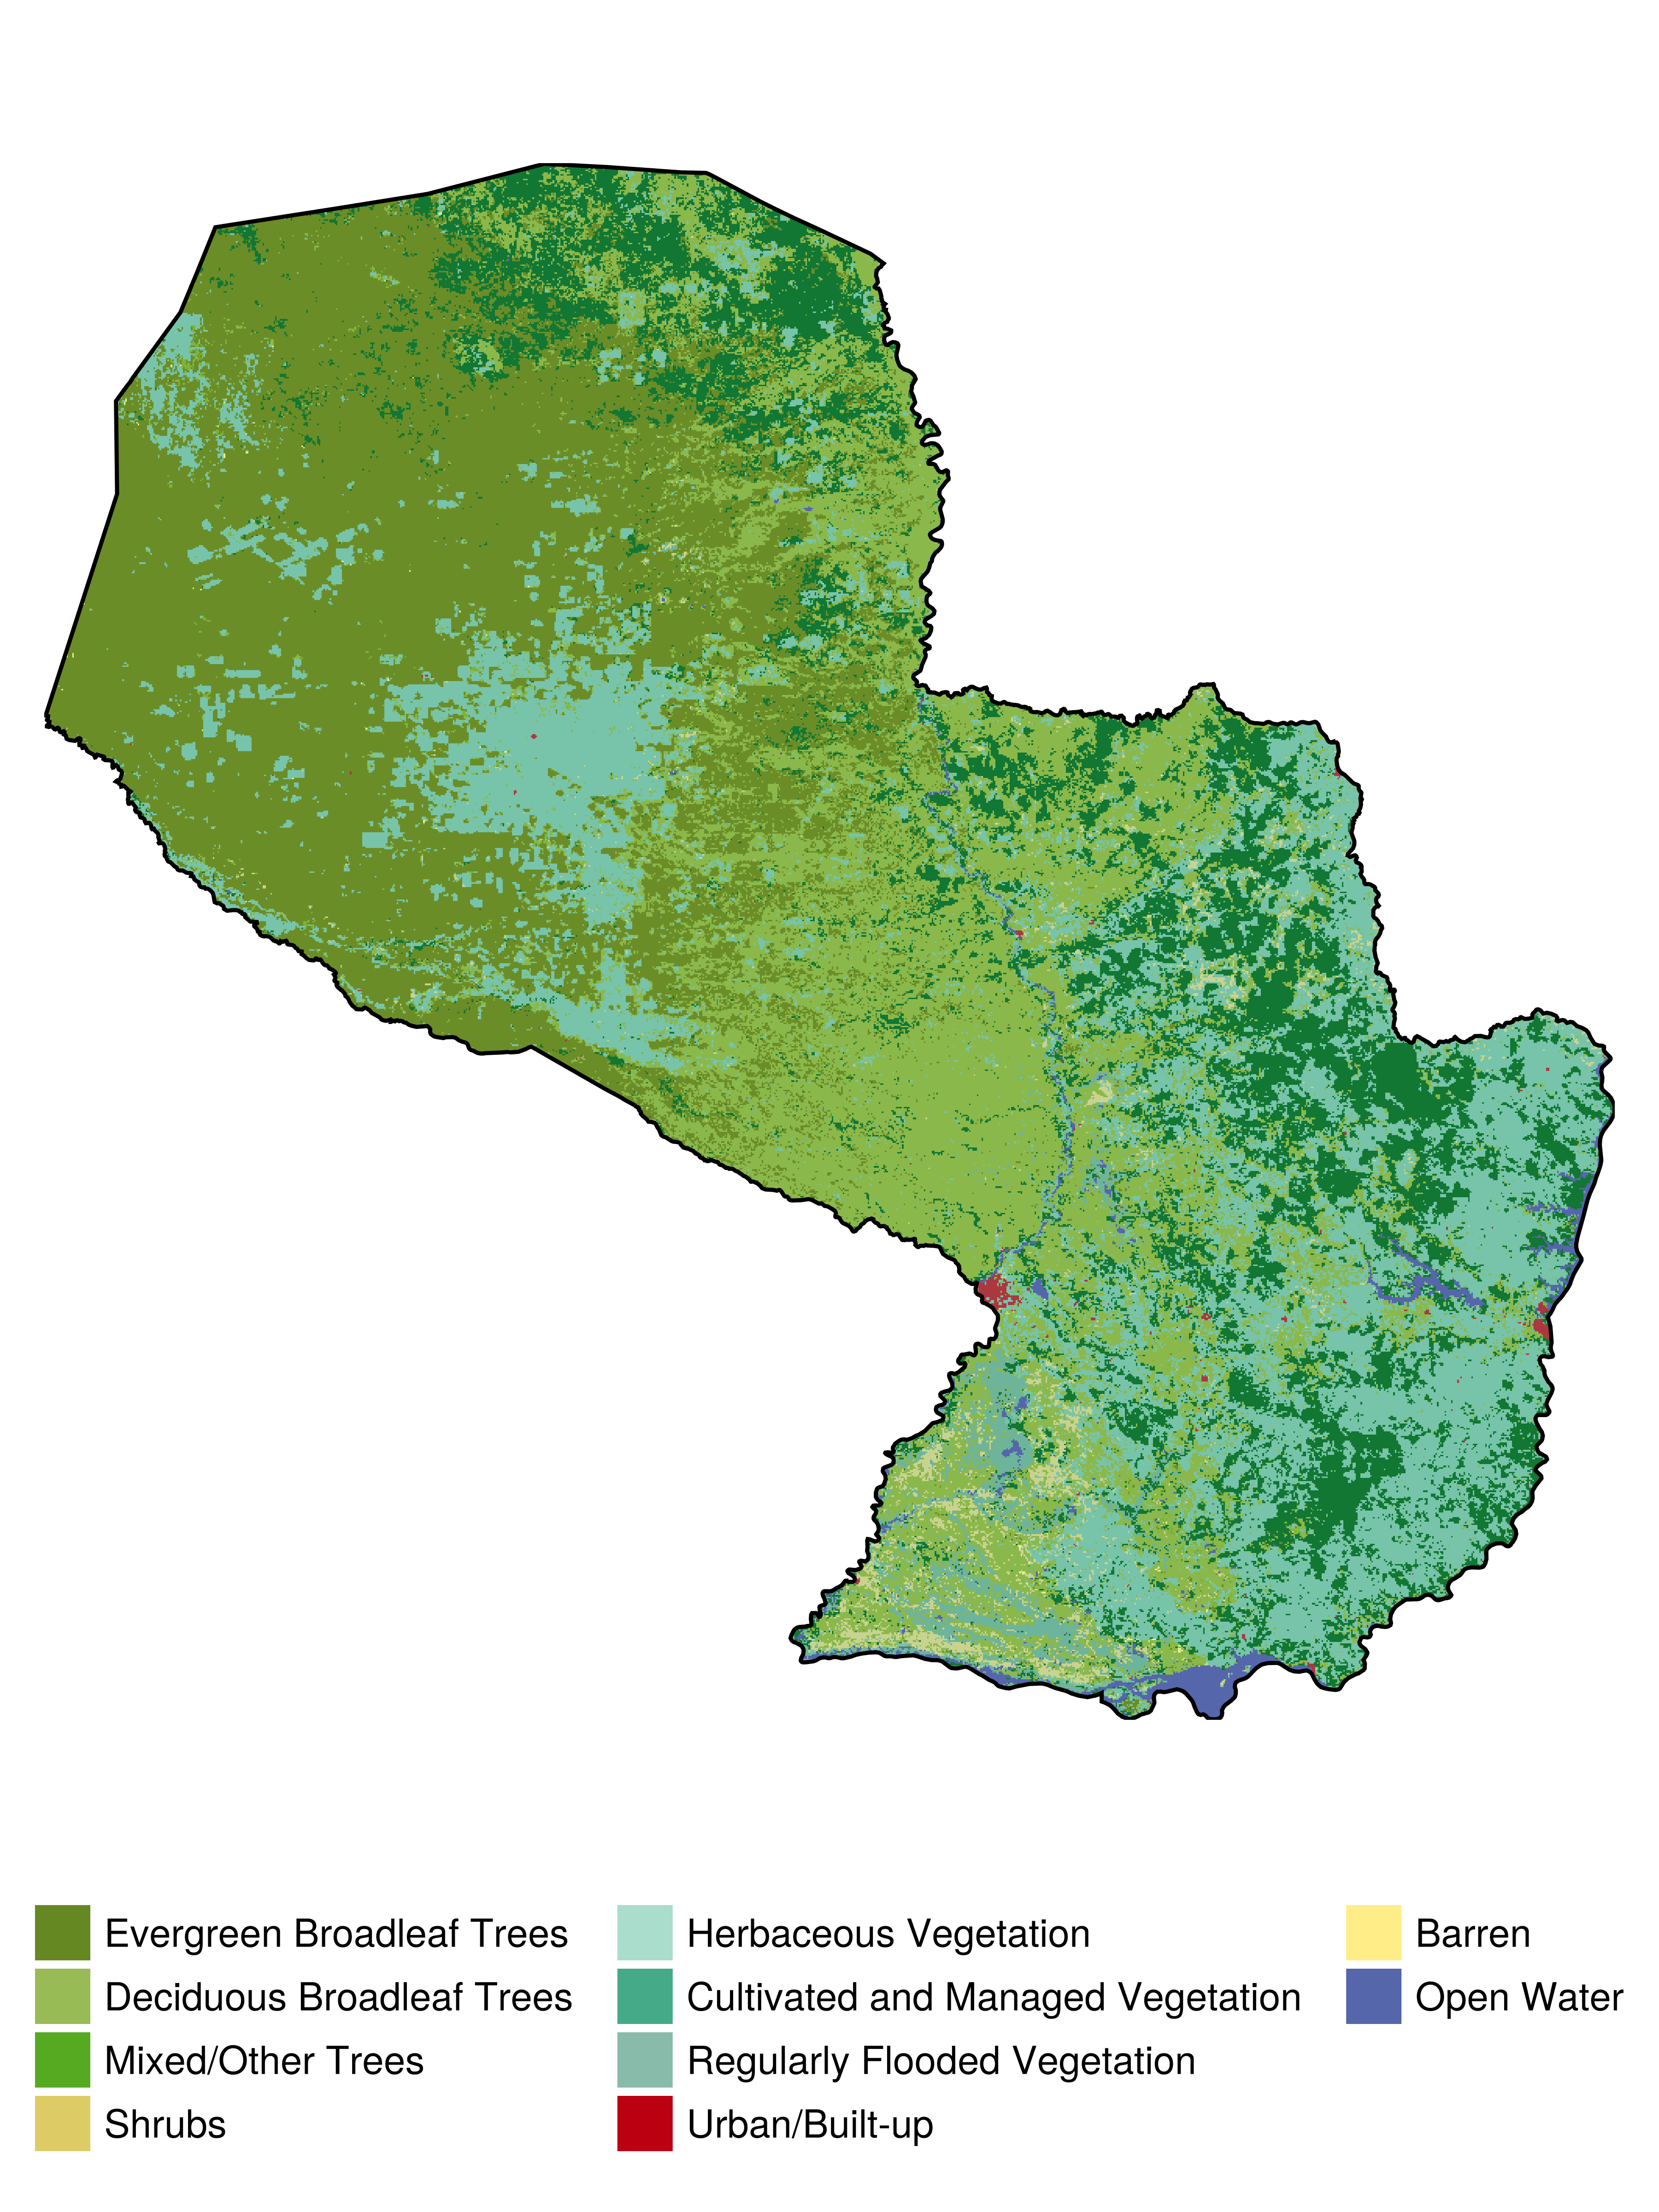

In [ ]:
#| label: fig-landcover-consensus
#| fig-cap: "Land cover consensus (defined as the class with the strongest local representation) in the country of Paraguay. Only the classes that were most abundant in at least one pixel are represented. The code to produce this ﬁgure is available as Supp. Mat. 2."
fig = Figure(; size=(600, 800))
panel = Axis(fig[1, 1]; aspect = DataAspect())
heatmap!(panel, consensus; colormap = landcover_colors)
lines!(panel, place[1].geometry, color=:black)
tightlimits!(panel)
hidespines!(panel)
hidedecorations!(panel)
Legend(
    fig[2, 1],
    [PolyElement(; color = landcover_colors[i]) for i in present],
    layers(provider)[present];
    orientation = :horizontal,
    nbanks = 4,
    framevisible=false
)
fig